In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier, HRPOpt
from pypfopt import risk_models
from pypfopt import expected_returns

In [2]:
sectorToStockMap = {
    'Industrials': ['J37.SI', 'J36.SI', 'U96.SI', 'S58.SI', 'C6L.SI', 'S63.SI', 'BS6.SI', 'C52.SI', 'BN4.SI'],
    'Consumer Staples': ['D01.SI', 'F34.SI'], #'Y92.SI'
    'Real Estate': ['A17U.SI', 'N2IU.SI', 'H78.SI', 'M44U.SI', 'C09.SI','U14.SI', 'C31.SI', 'C38U.SI', 'C61U.SI', 'ME8U.SI'],
    'Consumer Discretionary': ['G13.SI', 'C07.SI'],
    'Financials': ['D05.SI', 'O39.SI', 'U11.SI', 'S68.SI'],
    'Communication': ['Z74.SI'],
    'Technology': ['V03.SI']
}

In [3]:
start = '2015-01-01'
end = '2020-01-01'

# Obtain and visualise the securities data

In [4]:
securities = []
for k, v  in sectorToStockMap.items():
    securities.extend(v)
securities

['J37.SI',
 'J36.SI',
 'U96.SI',
 'S58.SI',
 'C6L.SI',
 'S63.SI',
 'BS6.SI',
 'C52.SI',
 'BN4.SI',
 'D01.SI',
 'F34.SI',
 'A17U.SI',
 'N2IU.SI',
 'H78.SI',
 'M44U.SI',
 'C09.SI',
 'U14.SI',
 'C31.SI',
 'C38U.SI',
 'C61U.SI',
 'ME8U.SI',
 'G13.SI',
 'C07.SI',
 'D05.SI',
 'O39.SI',
 'U11.SI',
 'S68.SI',
 'Z74.SI',
 'V03.SI']

In [5]:
MASTERDATA = {}
MASTERDATA = data.DataReader(securities, start=start, end=end, data_source='yahoo')['Adj Close']
MASTERDATA = pd.DataFrame(MASTERDATA)
MASTERDATA.head()

Symbols,J37.SI,J36.SI,U96.SI,S58.SI,C6L.SI,S63.SI,BS6.SI,C52.SI,BN4.SI,D01.SI,...,C61U.SI,ME8U.SI,G13.SI,C07.SI,D05.SI,O39.SI,U11.SI,S68.SI,Z74.SI,V03.SI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,31.992891,50.137966,3.783815,2.554119,10.140653,2.640869,0.952853,2.021795,6.964927,7.278768,...,1.240672,1.054197,0.903058,32.739243,16.175880,8.319798,20.098755,6.262908,2.953824,5.821934
2015-01-05,31.796331,49.752426,3.665041,2.504038,10.175771,2.625380,0.984352,2.006362,6.831290,7.278768,...,1.237102,1.057723,0.890398,31.956396,15.812912,8.200946,19.647739,6.230540,2.946230,5.799909
2015-01-06,31.478085,49.079754,3.571718,2.487344,10.254790,2.571168,0.976477,2.014078,6.540430,7.230353,...,1.237102,1.057723,0.869299,31.236177,15.647204,8.050397,19.122925,6.165809,2.915857,5.763200
2015-01-07,31.450001,48.677795,3.588686,2.487344,10.500625,2.594402,1.007976,1.990928,6.564013,7.262629,...,1.287018,1.057723,0.860859,31.103052,15.623536,8.066243,19.221327,6.238634,2.931044,5.741176
2015-01-08,31.599766,48.850063,3.614137,2.478997,10.553304,2.602146,1.000101,1.983212,6.658346,7.278768,...,1.265622,1.071826,0.869299,31.236177,15.844473,8.319798,19.696943,6.327640,2.991791,5.799909


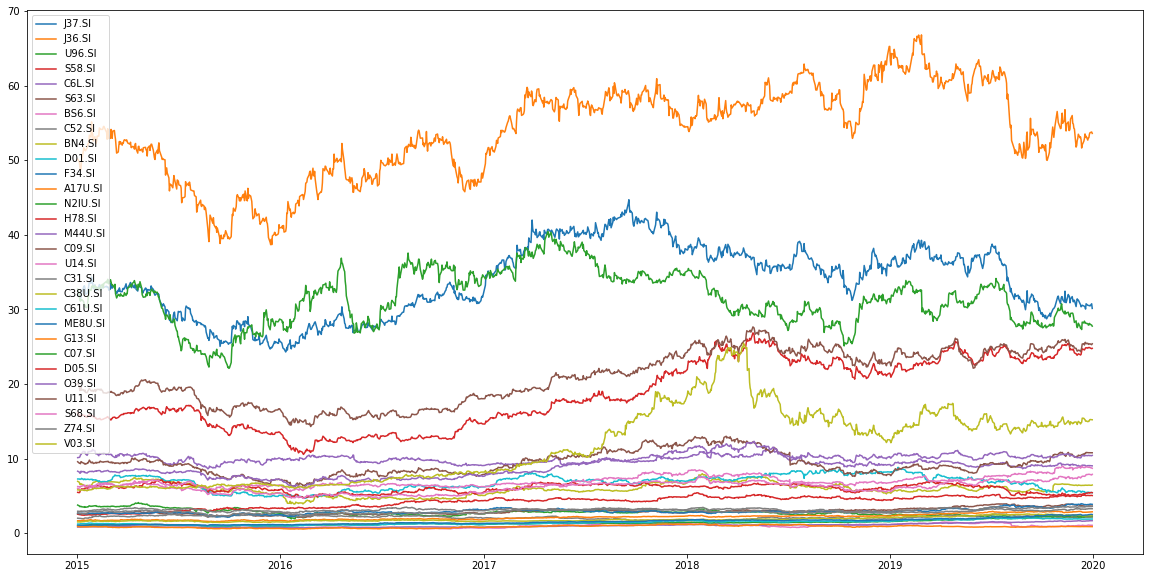

In [6]:
plt.figure(figsize=(20,10))
plt.plot(MASTERDATA)
plt.legend(MASTERDATA.columns)

# Define simulation variables and compute optimal weights

In [7]:
window = 110 # Size of moving window
rebalancingInterval = 20 # How often the weights are stored

In [8]:
weights = pd.DataFrame(columns=MASTERDATA.columns)
counter = 0
dataset = MASTERDATA.copy()
performance = pd.DataFrame(columns=['Expected annual return', 'Annual volatility', 'Sharpe Ratio'])
for i in range(window, len(dataset)):
    if counter%rebalancingInterval == 0:
        ts = dataset.iloc[i-window:i]
        mu = expected_returns.mean_historical_return(ts)
        S = risk_models.sample_cov(ts)
        ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
        rawWeights = ef.max_sharpe()
        cleanedWeights = ef.clean_weights()
        res = [a[1] for a in cleanedWeights.items()]
        weights.loc[dataset.index[i]] = res
        performance.loc[dataset.index[i]] = ef.portfolio_performance()
    counter += 1
weights.head()

Symbols,J37.SI,J36.SI,U96.SI,S58.SI,C6L.SI,S63.SI,BS6.SI,C52.SI,BN4.SI,D01.SI,...,C61U.SI,ME8U.SI,G13.SI,C07.SI,D05.SI,O39.SI,U11.SI,S68.SI,Z74.SI,V03.SI
2015-06-12,0.0,0.0,0.0,0.27167,0.0,0.0,0.23428,0.11182,0.0,0.0,...,0.0,0.09491,0.0,0.0,0.04927,0.0,0.0,0.0,0.02506,0.03108
2015-07-10,0.0,0.0,0.0,0.64137,0.0,0.0,0.16687,0.06454,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.05427,0.0,0.0,0.0,0.00000,0.04221
2015-08-11,0.0,0.0,0.0,0.45098,0.0,0.0,0.13759,0.06390,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.15859,0.0,0.0,0.0,0.00000,0.18895
2015-09-08,0.0,0.0,0.0,0.95276,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.04724
2015-10-08,0.0,0.0,0.0,0.79612,0.0,0.0,0.00000,0.00796,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.19593


# Group stocks by sector based on mapping defined above

In [9]:
sectorWeights = pd.DataFrame()
for k, v in sectorToStockMap.items():
    sectorWeights[k] = weights[v].apply(sum, axis=1)
sectorWeights.head()

,Industrials,Consumer Staples,Real Estate,Consumer Discretionary,Financials,Communication,Technology
2015-06-12,0.61777,0.0,0.27684,0.0,0.04927,0.02506,0.03108
2015-07-10,0.87278,0.0,0.03074,0.0,0.05427,0.00000,0.04221
2015-08-11,0.65247,0.0,0.00000,0.0,0.15859,0.00000,0.18895
2015-09-08,0.95276,0.0,0.00000,0.0,0.00000,0.00000,0.04724
2015-10-08,0.80408,0.0,0.00000,0.0,0.00000,0.00000,0.19593


# Plot a bar chart to view the proportion of each sector

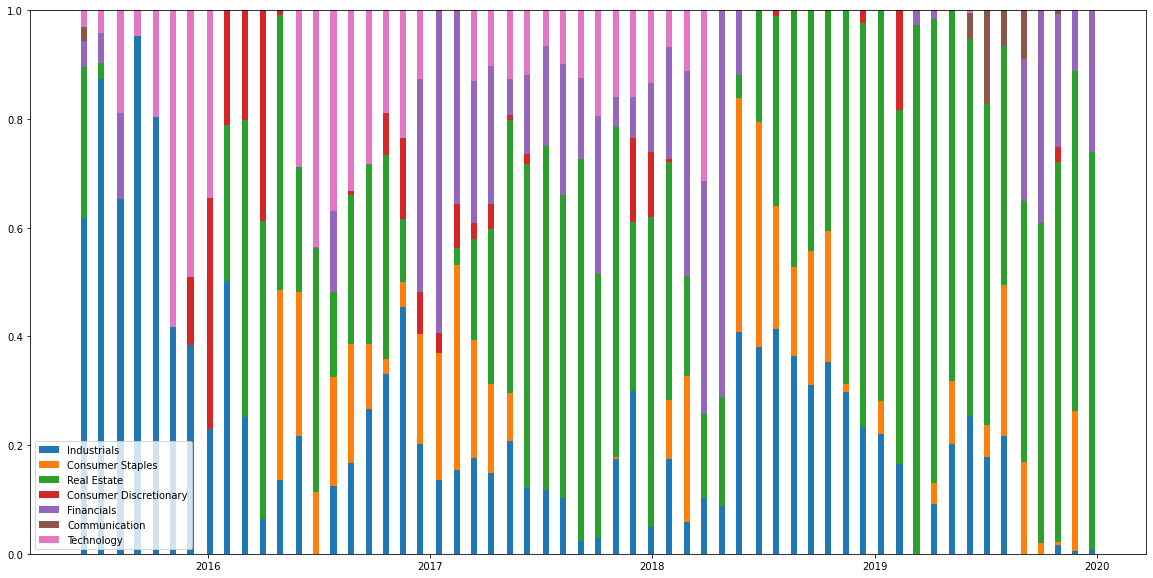

In [10]:
plt.figure(figsize=(20,10))
ind = sectorWeights.index
prev = None
for stock in sectorWeights.columns:
    if prev is not None:
        plt.bar(ind, sectorWeights[stock], width=10, bottom=prev)
        prev = prev + sectorWeights[stock]
    else:
        plt.bar(ind, sectorWeights[stock], width=10)
        prev = sectorWeights[stock]
plt.legend(sectorWeights.columns)
plt.show()

# Compute the returns of the optimal portfolio

In [11]:
weightsCopy = weights.copy()
portfolioReturns = pd.DataFrame(columns=['Portfolio'])
weightsCopy = weightsCopy.reindex(MASTERDATA.index, method='ffill').dropna()
stockReturns = np.log(MASTERDATA.copy()).diff().dropna().loc[weightsCopy.index[0]:]
portfolioReturns['Portfolio'] = (stockReturns.mul(weightsCopy)).apply(lambda x: sum(x), axis=1)
stockReturns['Portfolio'] = portfolioReturns['Portfolio']
stockReturns.head()

Symbols,J37.SI,J36.SI,U96.SI,S58.SI,C6L.SI,S63.SI,BS6.SI,C52.SI,BN4.SI,D01.SI,...,ME8U.SI,G13.SI,C07.SI,D05.SI,O39.SI,U11.SI,S68.SI,Z74.SI,V03.SI,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-12,-0.001256,-0.013723,0.002522,-0.005865,0.003795,-0.006006,-0.020907,0.025318,0.002345,0.005914,...,0.000000,-0.005510,-0.001089,-0.010432,0.005917,0.001291,-0.003748,0.009546,0.001290,-0.003678
2015-06-15,-0.009156,-0.013913,-0.012674,0.011696,0.002837,-0.015175,-0.007067,0.000000,-0.014151,0.009390,...,0.009820,0.010989,-0.015373,-0.011023,-0.013862,-0.014295,-0.007538,-0.011948,0.001288,0.000782
2015-06-16,-0.037814,-0.037471,-0.002554,0.000000,-0.016183,-0.003063,0.007067,0.003120,0.009456,-0.007034,...,0.000000,-0.005480,-0.003325,-0.010172,-0.003996,-0.005249,-0.012691,-0.002407,0.006414,-0.000770
2015-06-17,0.006893,0.020159,-0.002561,0.011561,0.013346,0.006116,-0.007067,0.000000,0.000000,0.008201,...,0.016156,0.027102,0.020874,0.011617,0.013917,0.008299,0.017722,0.011976,0.016487,0.007902
2015-06-18,-0.013502,-0.001962,-0.007722,0.002869,0.005666,0.003044,0.000000,-0.009390,0.001176,0.006977,...,0.006390,-0.010753,-0.020041,-0.009671,-0.009921,0.000435,-0.011357,0.000000,0.003766,-0.004629


In [12]:
weightsCopy.iloc[-1]

Symbols
J37.SI     0.00000
J36.SI     0.00000
U96.SI     0.00000
S58.SI     0.00668
C6L.SI     0.00000
S63.SI     0.00000
BS6.SI     0.00000
C52.SI     0.00000
BN4.SI     0.00000
D01.SI     0.00000
F34.SI     0.00000
A17U.SI    0.00000
N2IU.SI    0.11929
H78.SI     0.00000
M44U.SI    0.13523
C09.SI     0.23037
U14.SI     0.00000
C31.SI     0.00000
C38U.SI    0.00000
C61U.SI    0.00000
ME8U.SI    0.24736
G13.SI     0.00000
C07.SI     0.00000
D05.SI     0.00000
O39.SI     0.00000
U11.SI     0.00000
S68.SI     0.26106
Z74.SI     0.00000
V03.SI     0.00000
Name: 2019-12-31 00:00:00, dtype: float64

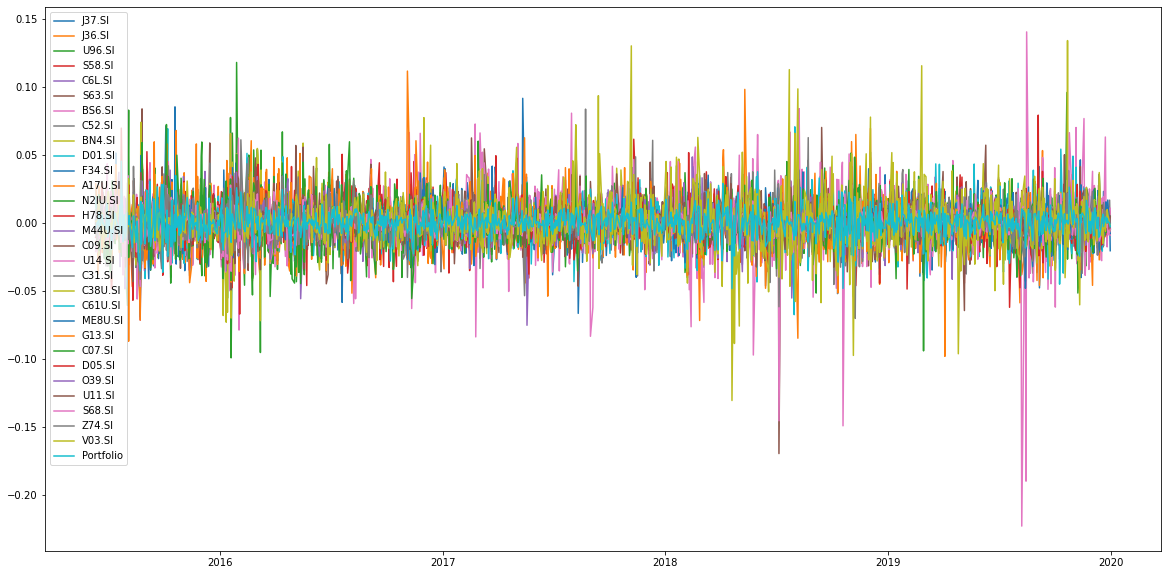

In [13]:
plt.figure(figsize=(20,10))
plt.plot(stockReturns)
plt.legend(stockReturns.columns)

# Compute the value of the portfolio on the last day

In [14]:
initialCapital = 100000

In [15]:
portfolioValue = pd.DataFrame(columns=stockReturns.columns)
for column in stockReturns.columns:
    portfolioValue[column] = stockReturns[column].add(1).fillna(1).cumprod()*initialCapital
portfolioValue.tail()

Symbols,J37.SI,J36.SI,U96.SI,S58.SI,C6L.SI,S63.SI,BS6.SI,C52.SI,BN4.SI,D01.SI,...,ME8U.SI,G13.SI,C07.SI,D05.SI,O39.SI,U11.SI,S68.SI,Z74.SI,V03.SI,Portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-25,91071.723072,96670.338045,53559.750703,162990.515271,92342.362513,128514.742596,66676.105656,80063.114264,81183.945888,71381.368921,...,214145.455215,97664.019576,82493.422985,136284.888829,120543.688192,122018.996940,126855.224288,98149.119073,202784.183407,145987.442954
2019-12-26,91071.723072,97562.602318,53795.177300,162668.710144,92444.119524,127862.379966,65506.322358,80063.114264,81183.945888,70884.796159,...,214145.455215,97664.019576,83145.117532,136337.312626,120103.742023,122342.963519,127558.806628,98149.119073,204805.705679,146500.404781
2019-12-27,90866.182349,97895.970737,53558.715865,162668.710144,92342.250382,128511.431093,65506.322358,80063.114264,80943.044535,71008.397709,...,216621.139861,97664.019576,82844.707807,136074.880384,120323.117745,122342.963519,126424.951043,98149.119073,206197.670111,146696.061582
2019-12-30,91741.870917,98071.565647,54028.529669,163310.401537,92036.314938,127859.085272,65506.322358,81414.426177,80943.044535,70884.580635,...,217449.508906,97137.523687,82462.183892,135444.163354,119993.313429,121785.596457,125575.500309,98439.938424,205943.568319,146695.714428
2019-12-31,89875.262253,97719.422827,54028.529669,162666.178816,92036.314938,128184.005947,64924.041589,81073.073232,81422.706953,70636.736051,...,215783.222721,96611.034280,82052.260724,135706.107300,120540.977213,122386.550608,125009.847898,98148.257365,205689.492342,146314.655755


In [16]:
portfolioValue.iloc[-1]

Symbols
J37.SI        89875.262253
J36.SI        97719.422827
U96.SI        54028.529669
S58.SI       162666.178816
C6L.SI        92036.314938
S63.SI       128184.005947
BS6.SI        64924.041589
C52.SI        81073.073232
BN4.SI        81422.706953
D01.SI        70636.736051
F34.SI       125016.077070
A17U.SI      158377.576331
N2IU.SI      198987.562674
H78.SI        71673.478714
M44U.SI      193507.683165
C09.SI       103683.511262
U14.SI       117082.250094
C31.SI       116749.623977
C38U.SI      140745.013941
C61U.SI      158111.554278
ME8U.SI      215783.222721
G13.SI        96611.034280
C07.SI        82052.260724
D05.SI       135706.107300
O39.SI       120540.977213
U11.SI       122386.550608
S68.SI       125009.847898
Z74.SI        98148.257365
V03.SI       205689.492342
Portfolio    146314.655755
Name: 2019-12-31 00:00:00, dtype: float64

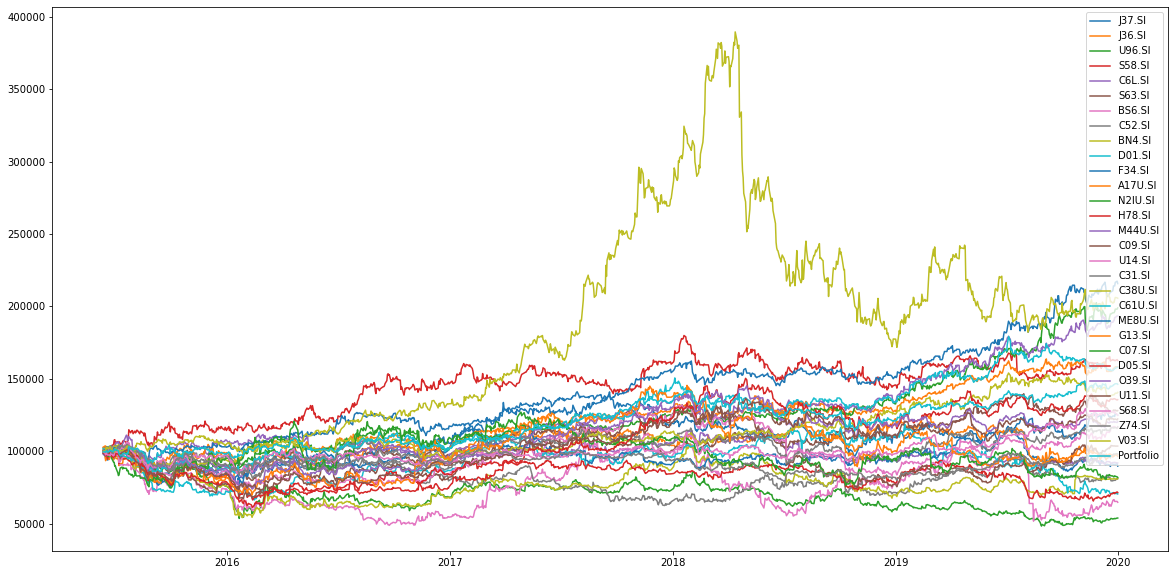

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(portfolioValue)
plt.legend(portfolioValue.columns)

# Value of the portfolio

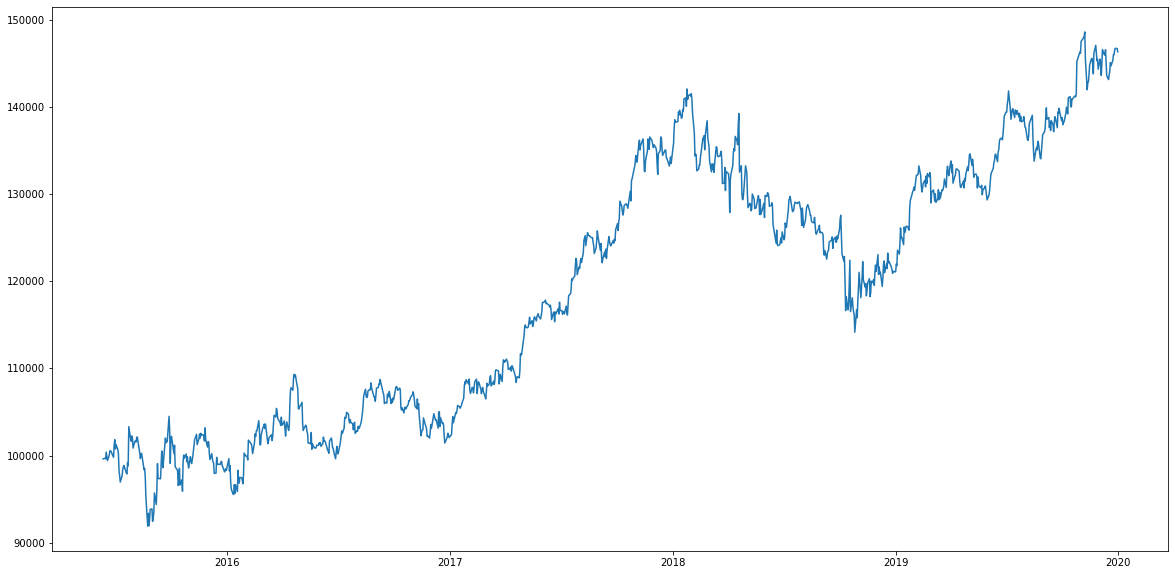

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(portfolioValue['Portfolio'])

# Portfolio ranking

In [19]:
portfolioValue.loc['2019-12-31'].sort_values(ascending=False)

Symbols
ME8U.SI      215783.222721
V03.SI       205689.492342
N2IU.SI      198987.562674
M44U.SI      193507.683165
S58.SI       162666.178816
A17U.SI      158377.576331
C61U.SI      158111.554278
Portfolio    146314.655755
C38U.SI      140745.013941
D05.SI       135706.107300
S63.SI       128184.005947
F34.SI       125016.077070
S68.SI       125009.847898
U11.SI       122386.550608
O39.SI       120540.977213
U14.SI       117082.250094
C31.SI       116749.623977
C09.SI       103683.511262
Z74.SI        98148.257365
J36.SI        97719.422827
G13.SI        96611.034280
C6L.SI        92036.314938
J37.SI        89875.262253
C07.SI        82052.260724
BN4.SI        81422.706953
C52.SI        81073.073232
H78.SI        71673.478714
D01.SI        70636.736051
BS6.SI        64924.041589
U96.SI        54028.529669
Name: 2019-12-31 00:00:00, dtype: float64

In [20]:
datasetNoRebal = MASTERDATA.copy()
datasetNoRebal = datasetNoRebal.loc[:'2015-06-11']
muNoRebal = expected_returns.mean_historical_return(datasetNoRebal)
SNoRebal = risk_models.sample_cov(datasetNoRebal)
efNoRebal = EfficientFrontier(muNoRebal, SNoRebal, weight_bounds=(0, 1))
rawWeightsNoRebal = efNoRebal.max_sharpe()
cleanedWeightsNoRebal = efNoRebal.clean_weights()
resNoRebal = [a[1] for a in cleanedWeightsNoRebal.items()]
weightsNoRebal = pd.DataFrame(columns=MASTERDATA.columns)
weightsNoRebal.loc[weightsCopy.index[0]] = resNoRebal

weightsNoRebal = weightsNoRebal.reindex(MASTERDATA.index, method='ffill').dropna()
stockReturnsNoRebal = stockReturns.copy()
stockReturnsNoRebal.drop('Portfolio', axis=1, inplace=True)
portfolioReturnsNoRebal = pd.DataFrame(columns=['Portfolio Without Rebalance'])
portfolioReturnsNoRebal['Portfolio Without Rebalance'] = (stockReturnsNoRebal.mul(weightsNoRebal)).apply(lambda x: sum(x), axis=1)

portfolioValueNoRebal = pd.DataFrame(columns=portfolioReturnsNoRebal.columns)
portfolioValueNoRebal['Portfolio Without Rebalance'] = portfolioReturnsNoRebal['Portfolio Without Rebalance'].add(1).fillna(1).cumprod()*initialCapital

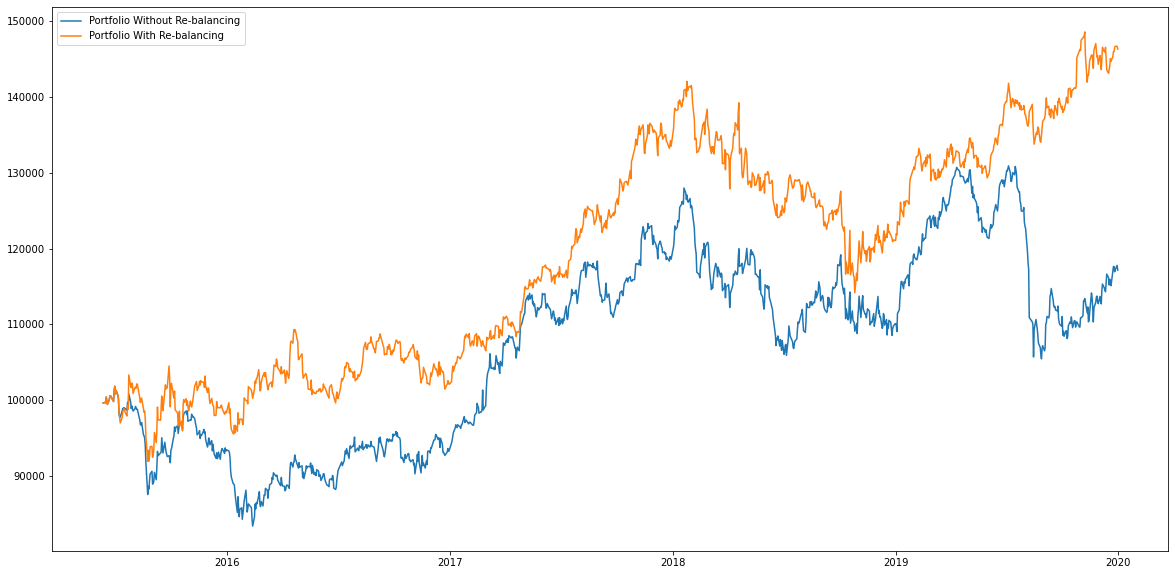

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(portfolioValueNoRebal['Portfolio Without Rebalance'])
plt.plot(portfolioValue['Portfolio'])
plt.legend(['Portfolio Without Re-balancing', 'Portfolio With Re-balancing'])

# PortfolioRebalancer class
This class does the same thing as the above pieces of code but in a more compact form for faster iteration or testing.

In [22]:
class PortfolioRebalancer():
    
    def __init__(self, securities, start, end, window=110, rebalancingInterval=40, viewBySector=True, startingCapital=10000):
        self.securities = securities if type(securities) is list else [a for v in securities.values() for a in v]
        self.sectorToSecuritiesMap = securities if type(securities) is dict else None
        self.start = start
        self.end = end
        self.MASTERDATA = pd.DataFrame()
        self.window = window
        self.rebalancingInterval = rebalancingInterval
        self.viewBySector = viewBySector
        self.startingCapital = startingCapital
        print('Securities used: {}'.format(self.securities))
    
    def setUpData(self):
        dataDict = {}
        dataDict = data.DataReader(self.securities, start=self.start, end=self.end, data_source='yahoo')['Adj Close']
        self.MASTERDATA = pd.DataFrame(dataDict)
        self.showData(self.MASTERDATA)
        
    def showData(self, data):
        plt.figure(figsize=(20,10))
        plt.plot(data)
        plt.legend(data.columns)
    
    def calculateWeightsAndReturns(self):
        dataset = self.MASTERDATA.copy()
        weights = pd.DataFrame(columns=self.securities)
        perf = pd.DataFrame(columns=['Expected annual return', 'Annual volatility', 'Sharpe Ratio'])
        counter = 0
        for i in range(window, len(dataset)):
            if counter%self.rebalancingInterval == 0:
                ts = dataset.iloc[i-self.window:i]
                mu = expected_returns.mean_historical_return(ts)
                S = risk_models.sample_cov(ts)
                ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
                rawWeights = ef.max_sharpe()
                cleanedWeights = ef.clean_weights()
                res = [a[1] for a in cleanedWeights.items()]
                weights.loc[dataset.index[i]] = res
                perf.loc[dataset.index[i]] = ef.portfolio_performance()
            counter += 1
        return weights, perf

    def visualiseBySector(self, weights):
        weightsCopy = weights.copy()
        table = pd.DataFrame()
        if self.sectorToSecuritiesMap is not None:
            for k, v in self.sectorToSecuritiesMap.items():
                table[k] = weightsCopy[v].apply(sum, axis=1)
        else:
            table = weightsCopy
        plt.figure(figsize=(20,10))
        ind = table.index
        prev = None
        for sector in table.columns:
            if prev is not None:
                plt.bar(ind, table[sector], width=10, bottom=prev)
                prev += table[sector].to_numpy()
            else:
                plt.bar(ind, table[sector], width=10)
                prev = table[sector].to_numpy()
        plt.legend(table.columns)
        plt.show()
        
    def calculateReturns(self, weights):
        weightsCopy = weights.copy()
        masterData = self.MASTERDATA.copy()
        portfolioWeights = weightsCopy.reindex(masterData.index, method='ffill').dropna()
        print('Current weights for {} are:'.format(portfolioWeights.index[-1]))
        print(portfolioWeights.iloc[-1])
        print('')
        # Calculate log returns of all stocks and restrict start date to the first date of weights DF
        masterData = np.log(masterData).diff().dropna().loc[portfolioWeights.index[0]:]
        
        portfolioReturns = pd.DataFrame(columns=['Portfolio'])
        portfolioReturns['Portfolio'] = (masterData.mul(portfolioWeights)).apply(lambda x: sum(x), axis=1)
        masterData['Portfolio'] = portfolioReturns['Portfolio']
        returnsData = masterData
        return returnsData
    
    def calculatePortfolioValue(self, returns):
        returnsCopy = returns.copy()
        portfolioValue = pd.DataFrame(columns=returnsCopy.columns)
        for column in returnsCopy.columns:
            portfolioValue[column] = returnsCopy[column].add(1).fillna(1).cumprod()*self.startingCapital
        return portfolioValue
    
    def analysePortfolio(self, portfolioValues):
        lastValues = portfolioValues.iloc[-1]
        self.showData(portfolioValues)
        print('Portfolio values sorted in descending order')
        print(lastValues.sort_values(ascending=False))
        
        
    def run(self):
        self.setUpData()
        weights, _ = self.calculateWeightsAndReturns()
        if self.viewBySector:
            self.visualiseBySector(weights)
        returns = self.calculateReturns(weights)
        portfolioValues = self.calculatePortfolioValue(returns)
        self.analysePortfolio(portfolioValues)
            
        

Securities used: ['J37.SI', 'J36.SI', 'U96.SI', 'S58.SI', 'C6L.SI', 'S63.SI', 'BS6.SI', 'C52.SI', 'BN4.SI', 'D01.SI', 'F34.SI', 'A17U.SI', 'N2IU.SI', 'H78.SI', 'M44U.SI', 'C09.SI', 'U14.SI', 'C31.SI', 'C38U.SI', 'C61U.SI', 'ME8U.SI', 'G13.SI', 'C07.SI', 'D05.SI', 'O39.SI', 'U11.SI', 'S68.SI', 'Z74.SI', 'V03.SI']


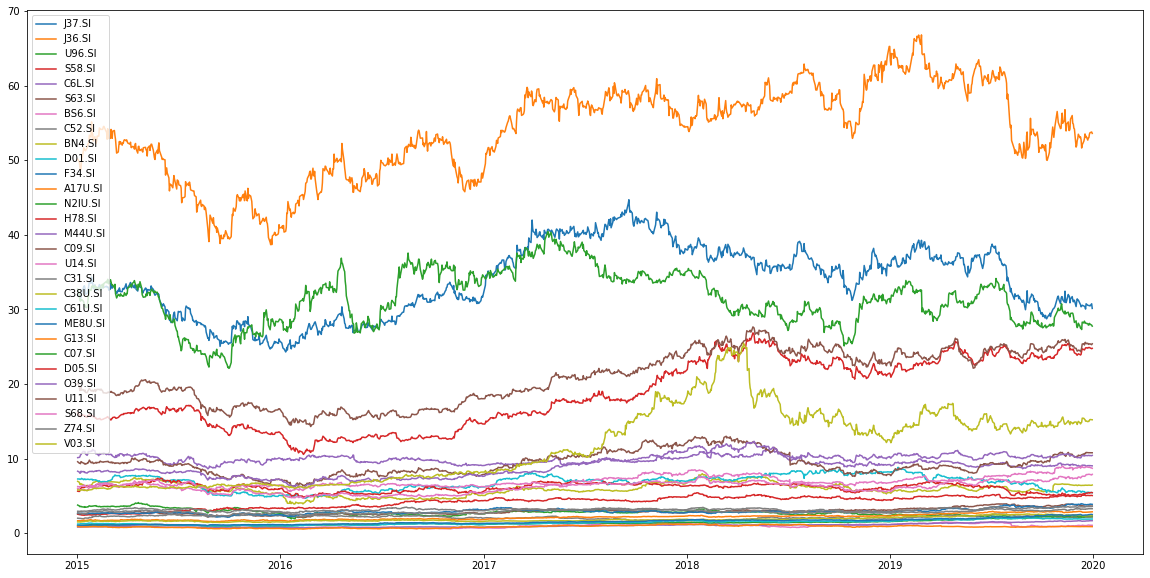

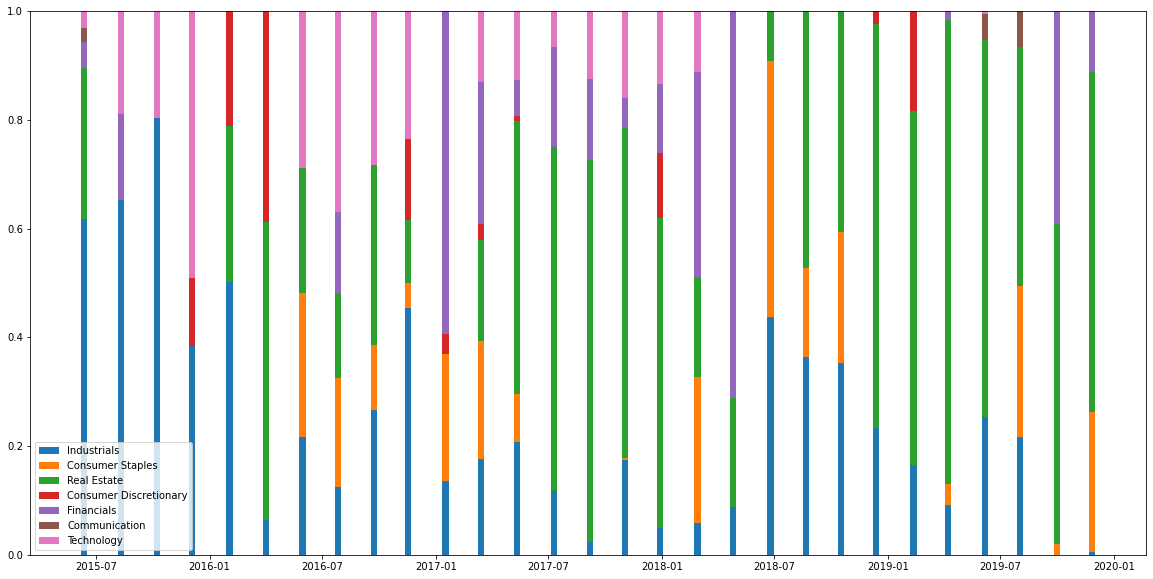

Current weights for 2019-12-31 00:00:00 are:
J37.SI     0.00000
J36.SI     0.00000
U96.SI     0.00000
S58.SI     0.00000
C6L.SI     0.00000
S63.SI     0.00000
BS6.SI     0.00000
C52.SI     0.00000
BN4.SI     0.00438
D01.SI     0.00000
F34.SI     0.25779
A17U.SI    0.00000
N2IU.SI    0.27999
H78.SI     0.00000
M44U.SI    0.00000
C09.SI     0.03752
U14.SI     0.00000
C31.SI     0.00000
C38U.SI    0.00000
C61U.SI    0.00000
ME8U.SI    0.30938
G13.SI     0.00000
C07.SI     0.00000
D05.SI     0.00000
O39.SI     0.00000
U11.SI     0.00000
S68.SI     0.11095
Z74.SI     0.00000
V03.SI     0.00000
Name: 2019-12-31 00:00:00, dtype: float64

Portfolio values sorted in descending order
Symbols
ME8U.SI      21578.322272
V03.SI       20568.949234
N2IU.SI      19898.756267
M44U.SI      19350.768317
S58.SI       16266.617882
A17U.SI      15837.757633
C61U.SI      15811.155428
Portfolio    14961.583228
C38U.SI      14074.501394
D05.SI       13570.610730
S63.SI       12818.400595
F34.SI       12501.6077

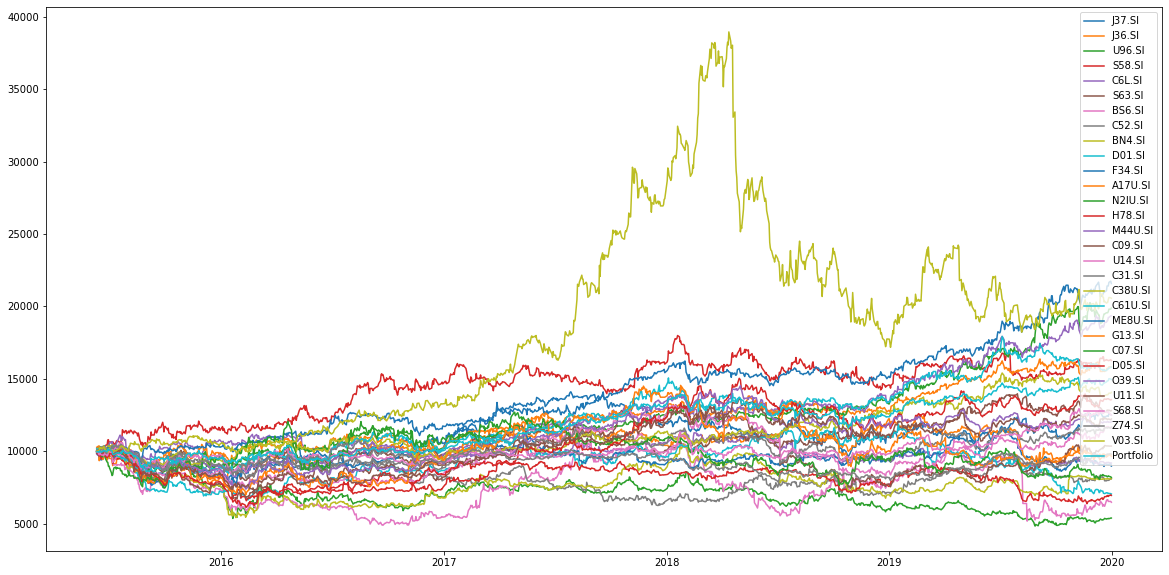

In [23]:
p = PortfolioRebalancer(sectorToStockMap, start, end)
p.run()

Securities used: ['AIY.SI', 'AWX.SI', 'J37.SI', 'J36.SI', 'U96.SI', 'S58.SI', 'C6L.SI', 'S63.SI', 'BS6.SI', 'C52.SI', 'BN4.SI', 'D01.SI', 'F34.SI', 'M44U.SI', 'C09.SI', 'U14.SI', 'C31.SI', 'C38U.SI', 'C61U.SI', 'ME8U.SI', 'G13.SI', 'C07.SI', 'D05.SI', 'O39.SI', 'U11.SI', 'S68.SI', 'Z74.SI', 'V03.SI']


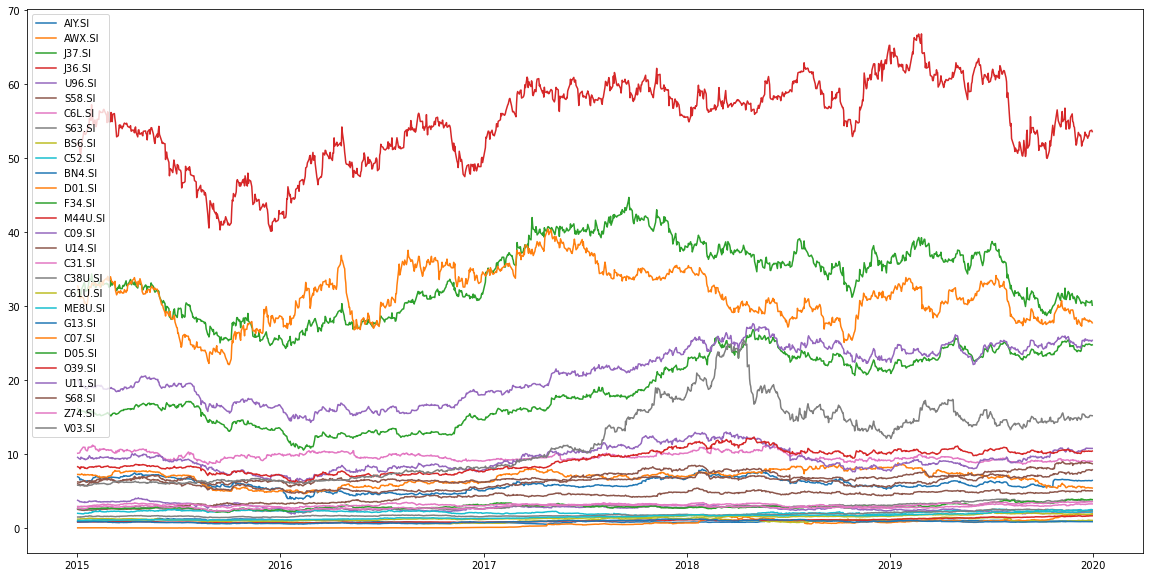

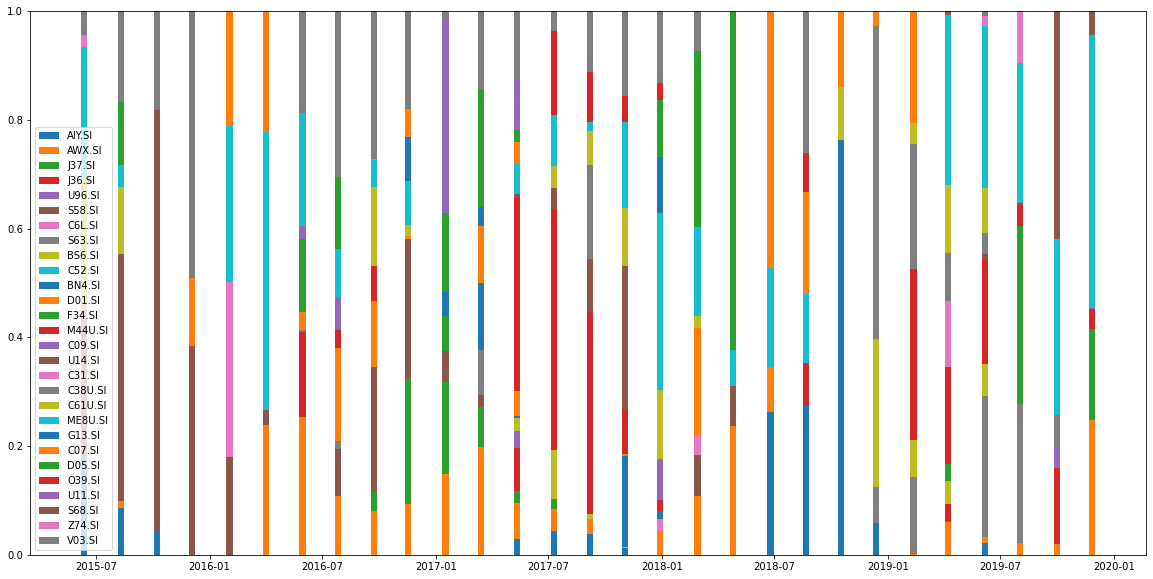

Current weights for 2019-12-31 00:00:00 are:
AIY.SI     0.00000
AWX.SI     0.24868
J37.SI     0.00000
J36.SI     0.00000
U96.SI     0.00000
S58.SI     0.00000
C6L.SI     0.00000
S63.SI     0.00000
BS6.SI     0.00000
C52.SI     0.00000
BN4.SI     0.00000
D01.SI     0.00000
F34.SI     0.16631
M44U.SI    0.03768
C09.SI     0.00164
U14.SI     0.00000
C31.SI     0.00000
C38U.SI    0.00000
C61U.SI    0.00000
ME8U.SI    0.50258
G13.SI     0.00000
C07.SI     0.00000
D05.SI     0.00000
O39.SI     0.00000
U11.SI     0.00000
S68.SI     0.04311
Z74.SI     0.00000
V03.SI     0.00000
Name: 2019-12-31 00:00:00, dtype: float64

Portfolio values sorted in descending order
Symbols
AWX.SI       181202.137021
Portfolio     21703.263150
ME8U.SI       21578.322272
V03.SI        20568.949234
M44U.SI       19350.768317
S58.SI        16266.617882
C61U.SI       15811.155428
C38U.SI       14074.501394
D05.SI        13570.610730
S63.SI        12818.400595
F34.SI        12501.607707
S68.SI        12500.984790
U11.

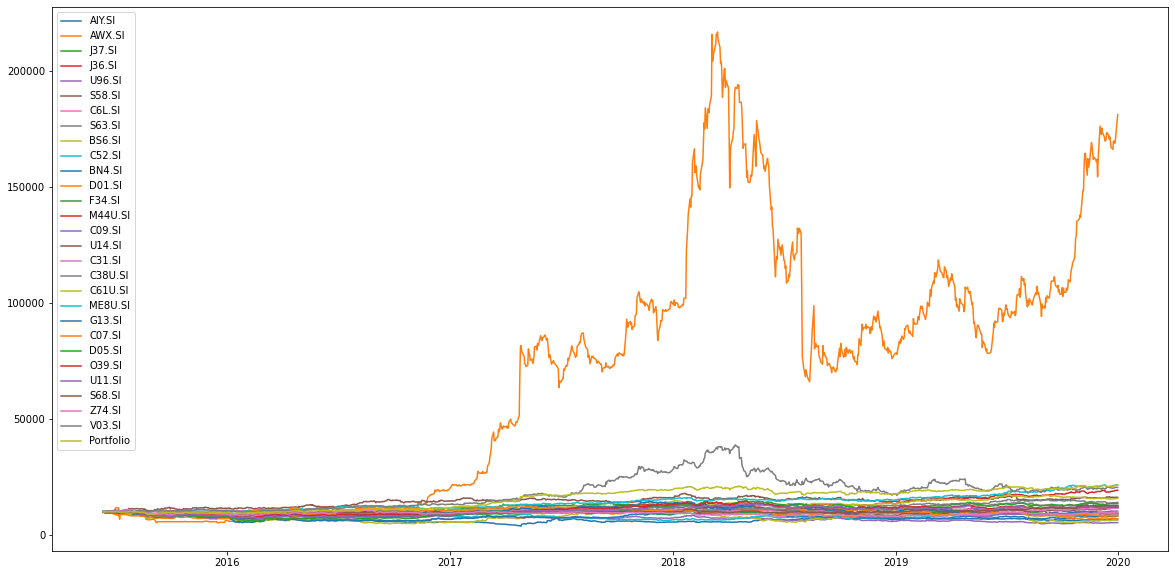

In [24]:
stockList = ['AIY.SI', 'AWX.SI', 'J37.SI', 'J36.SI', 'U96.SI', 'S58.SI', 'C6L.SI', 'S63.SI', 'BS6.SI', 'C52.SI', 'BN4.SI', 'D01.SI', 'F34.SI','M44U.SI', 'C09.SI', 'U14.SI', 'C31.SI', 'C38U.SI', 'C61U.SI', 'ME8U.SI', 'G13.SI', 'C07.SI', 'D05.SI', 'O39.SI', 'U11.SI', 'S68.SI', 'Z74.SI', 'V03.SI']

p = PortfolioRebalancer(stockList, start, end)
p.run()